# k-NN on Iris Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
from matplotlib.colors import ListedColormap
import random
import matplotlib.pyplot as plt
import sklearn
from sklearn import metrics
%matplotlib inline

In [42]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [32]:
# Helper function

def plot_decision_boundaries(X1, X2, model):
    x_min, x_max = X1.min() - 1, X1.max() + 1
    y_min, y_max = X2.min() - 1, X2.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    # Predictions to obtain the classification results
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)    

    # Plotting
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)
    plt.xlabel("X1",fontsize=15)
    plt.ylabel("X2",fontsize=15)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.show()

### Loading Dataset

In [33]:
iris = load_iris()
X = iris.data[:, 2:] # Petal Length and Width
y = iris.target

classes = iris.target_names
classes_dict = dict(zip(range(len(classes)), classes))

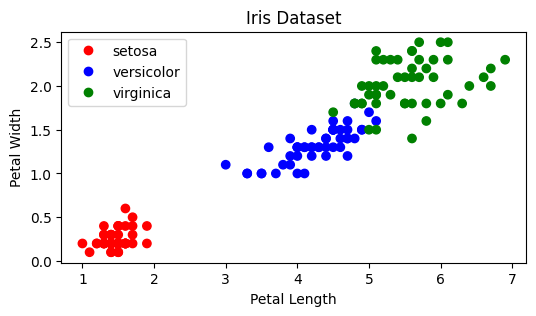

In [34]:
fig = plt.figure(figsize = (6, 3))
ax = plt.axes()
colors = ListedColormap(['r','b','g'])

ax.set_title("Iris Dataset")
ax.set_ylabel("Petal Width")
ax.set_xlabel("Petal Length")
sct = plt.scatter(X[:,0], X[:,1], c=y, cmap=colors)
plt.legend(handles=sct.legend_elements()[0], 
           labels=list(classes))
plt.show()

In [35]:
# Splitting in test and train
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state = 1412)

### Using Skicit-Learn

Manually searching for optimal k

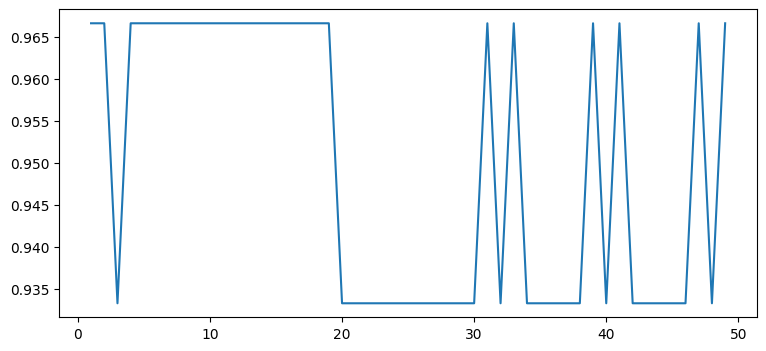

In [36]:
k_range = range(1,50)
acc_score = []

for k in k_range:
    knn_clf = KNeighborsClassifier(n_neighbors=k)
    knn_clf.fit(X_train, y_train)
    y_pred = knn_clf.predict(X_test)
    acc_score.append(accuracy_score(y_test, y_pred))
plt.figure(figsize=(9,4))  
plt.plot(k_range, acc_score)
plt.show()

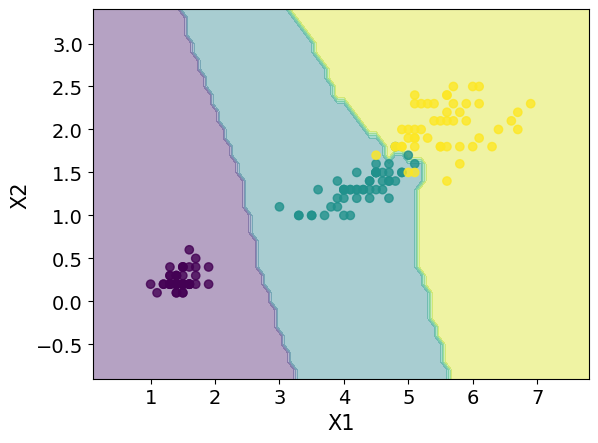

In [40]:
knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_train, y_train)

plot_decision_boundaries(X_train[:, 0], X_train[:, 1], knn_clf)

In [44]:
params = {'n_neighbors': list(range(1, 30))}
grid_search_cv = GridSearchCV(KNeighborsClassifier(), 
                              params, 
                              verbose=1, 
                              cv=3)
grid_search_cv.fit(X_train, y_train)

Fitting 3 folds for each of 29 candidates, totalling 87 fits


GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29]},
             verbose=1)

In [45]:
grid_search_cv.best_estimator_

KNeighborsClassifier(n_neighbors=18)

### Manually implementing k-NN

In [51]:
def knn_classifier(X_train, y_train, X_test, k):
    """
    Returns the labels outputted by the classifier for each of the 
    test datapoints.
    """
    predicted_labels = []
    
    # To make sure we can still perform for loop
    if len(X_test.shape) == 1:
        X_test = [X_test]
        
    # Standardize test and train data
    X_train = (X_train - np.mean(X_train, axis=0)) / np.std(X_train, axis=0)
    X_test = (X_test - np.mean(X_test, axis=0)) / np.std(X_test, axis=0)
    
    for testd in X_test:
        distances = np.linalg.norm(X_train - testd, ord=2, axis=1)
        # Extract k nearest training points and their labels
        nearest_neighbor_data = distances.argsort()[:k]
        nearest_neighbor_labels = y_train[nearest_neighbor_data].astype(int)
        test_label = np.bincount(nearest_neighbor_labels).argmax()
        predicted_labels.append(test_label)
        
    return predicted_labels

In [52]:
y_pred = knn_classifier(X_train, y_train, X_test, 18)

In [53]:
np.mean(y_pred==y_test)

0.9